<a href="https://colab.research.google.com/github/imcuky/deep-learning/blob/main/MNIST_ML_Models_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#Dataset

In [ ]:
#import the dataset
from keras.datasets import mnist

(train_X_np, train_y_np), (test_X_np, test_y_np) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# convert the data into tensor
(train_X, train_y), (test_X, test_y) = (torch.from_numpy(train_X_np), torch.from_numpy(train_y_np)) , (torch.from_numpy(test_X_np), torch.from_numpy(test_y_np))


In [ ]:

from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(train_X, train_y)
test_dataset = TensorDataset(test_X, test_y)

# group the data into batch
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=512)


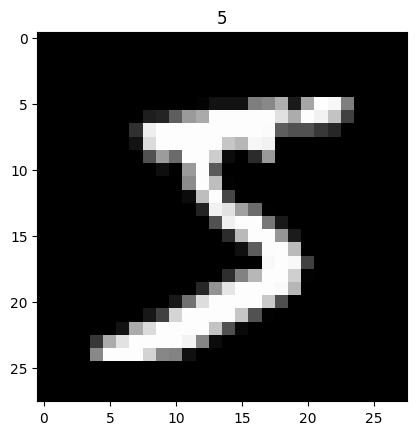

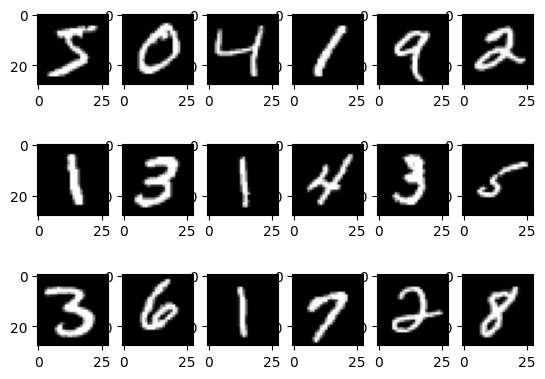

In [ ]:
# Show data sample


# Plot the first image from the training set
plt.imshow(train_X[0], cmap='gray')
plt.title(train_y[0].item())
plt.show()


for k, image in enumerate(train_X[:18]):
    plt.subplot(3, 6, k+1)
    plt.imshow(image, cmap='gray')


In [ ]:
train_loader.batch_size

512

# Train and Test

In [ ]:

def train_test(Model, iteration=10, lr=0.01):

  loss_list = []

  lossf = nn.CrossEntropyLoss()

  optimizer = torch.optim.SGD(Model.parameters(), lr)

  # Training

  for _ in range(iteration):

    for X, y in iter(train_loader):

      optimizer.zero_grad() # clear the gradient

      X = X.view(-1, 28*28).float()

      y_hat = Model(X)

      loss = lossf(y_hat, y)

      loss_list.append(float(loss))


      loss.backward() #calculate the gradient
      optimizer.step() # apply the update


  plt.plot(loss_list)
  plt.title("Training Loss")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")

  plt.show()


  # Testing
  correct = 0
  total = 0
  Model.eval()
  for X, y in iter(test_loader):
    X = X.view(-1, 28*28).float()
    y = y.view(-1, 1)
    outputs = Model(X)
    predict = torch.max(outputs.data,1)[1] # [1] returns the index (class) of the max value for each sample

    # Compute the accuracy
    total += y.size(0)
    correct += predict.eq(y.view_as(predict)).sum().item()

  print('Validation Accuracy: {:.2f}%'.format(100 * correct / total))


# Linear Classification

In [ ]:
# Linear classification

class Model(nn.Module):

  def __init__(self, input_size, num_classes):

    # call the superclass
    super(Model, self).__init__()
    # sum function
    self.linear = nn.Linear((input_size * input_size), num_classes)

  # active function
  def forward(self, x):

    return self.linear(x)


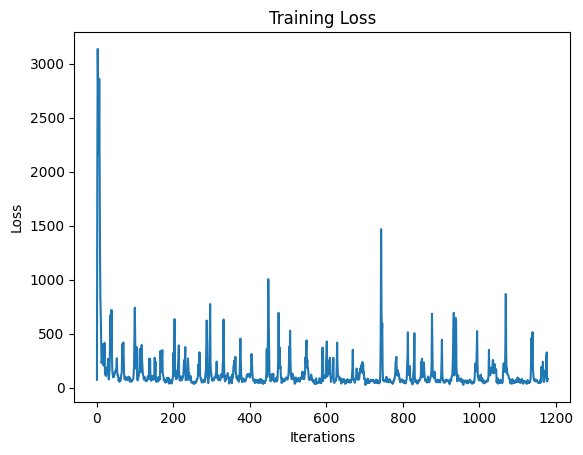

Validation Accuracy: 87.97%


In [ ]:
LR1 = Model(28, 10)
train_test(LR1, iteration=10, lr=0.01)

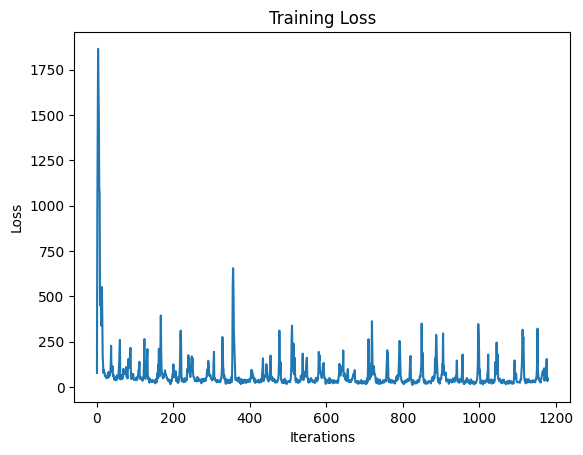

Validation Accuracy: 88.62%


In [ ]:
LR2 = Model(28, 10)
train_test(LR2, iteration=10, lr=0.005) # try a smaller learning rate

# MLP

In [ ]:
class MLP(nn.Module):
    # 1 hidden layer
    def __init__(self, in_features, hidden_features, out_features):

        super().__init__()
        self.linear1 = nn.Linear(in_features, hidden_features)
        self.linear2 = nn.Linear(hidden_features, out_features)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)

        return x

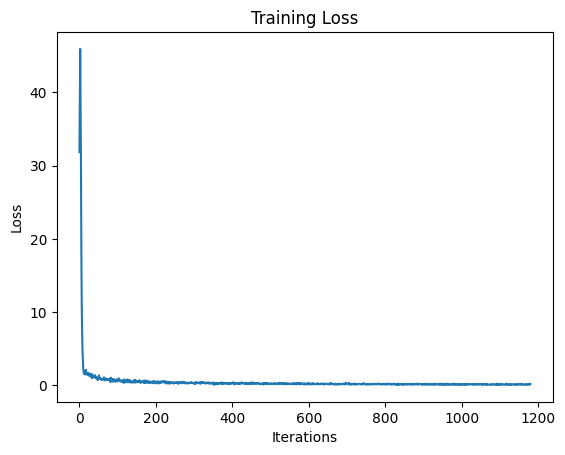

Validation Accuracy: 95.10%


In [ ]:
model = MLP((28*28), 512, 10)
train_test(model, iteration=10, lr=0.001)

# **MLP From scratch**

In [ ]:
import numpy as np

#np.random.seed(100)

![](https://corochann.com/wp-content/uploads/2021/09/mlp.png)

input layer: (28*28) <br>
hidden layer: (512) <br>
output layer: (10) / softmax

**Forward**

S = ∑(WX + b)

f(S) = max(S, 0)

**Predict**

f2 -> softmax() -> []

![](https://miro.medium.com/v2/resize:fit:1400/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg)

In [ ]:
def forward(X, w_1, b_1, w_2, b_2):

  s1 = X.dot(w_1) + b_1
  f1 = ReLU(s1)
  s2 = f1.dot(w_2) + b_2
  y = softmax(s2)

  return s1, f1, y


def ReLU(X):

  return np.maximum(X, 0)

def softmax(X):
  '''
    np.exp(X): each element will be transform into e^x
    X = [x1, x2, ..., xk]

    np.exp(X) -> [e^x1, e^x2, ..., e^xk]
  '''

  exp = np.exp(X)
  return exp / exp.sum(axis=1, keepdims=True)


**Loss**

In [ ]:
# l2 error for easy back propagation
#  1/m sum (y_hat − y)^2
def loss(predict, y):

  return np.sum((predict - y) **2) / y.shape[0]


In [ ]:
def ReLU_der(X):

  return X > 0

def prediction(X):

  return np.argmax(X,axis=1)


In [ ]:
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]


**Back propagation and **Gradient Descent****

![](https://miro.medium.com/v2/resize:fit:572/0*9lo2ux8ASvt6YJkH.gif)

![](https://media.geeksforgeeks.org/wp-content/uploads/Cost-Function.jpg)

In [ ]:
train_X_np = train_X_np.reshape(-1, 28*28)
X = train_X_np[:5000]/255  # normalize reduce the value of x to lower the total forward value
X.shape

(5000, 784)

In [ ]:
y = train_y_np[:5000]
y.shape

(5000,)

In [ ]:
# Xavier Initialization

# 28*28 input node links to each hidden layer node
w1 = np.random.rand(28*28, 512) / np.sqrt(28*28)

# the input value for the bias is 1
b1 = np.zeros((1, 512)) # one node link to 512 other nodes

w2 = np.random.rand(512, 10) / np.sqrt(512)
b2 = np.zeros((1, 10))


In [ ]:
#def gradient_descent(w1, b1, w2, b2):
alpha = 0.01

# Gradient Descent
loss_list = []

w1_new, w2_new, b1_new, b2_new = w1, w2, b1, b2

num_classes = np.max(train_y_np) + 1

m = train_X_np.shape[0]

# turn y into a one-hot vector
y_one_hot = one_hot(y, num_classes)

for i in range(500):

  # forward pass
  s1, f1, y_hat = forward(X, w1_new, b1_new, w2_new, b2_new)

  loss_ = loss(y_hat, y_one_hot)

  loss_list.append(loss_)

  # Back propagation
  #dE/s2 = y_hat - y_one_hot; dS2/o1 = w2 ; dO1/s1 = ReLU_der(s1) ; dS1/w1 = X ; dS2/w2 = f1

  # dE/w2 = dE/s2 * dS2/w2
  dEw2 = 1/m * f1.T.dot((y_hat - y_one_hot))

  dEb2 = 1/m * np.sum((y_hat - y_one_hot), axis=0, keepdims=True)


  # dE/w1 = dE/s2 * dS2/o1 * dO1/s1 * dS1/w1
  dEw1 = (((w2_new.dot( (y_hat - y_one_hot).T)) * ReLU_der(s1).T).dot(X)).T

  dEb1 = 1/m *  np.sum((w2_new.dot((y_hat - y_one_hot).T).T * ReLU_der(s1)), axis=0, keepdims=True)


  # update
  w1_new = w1_new - alpha * dEw1

  w2_new = w2_new - alpha * dEw2

  b1_new = b1_new - alpha * dEb1

  b2_new = b2_new - alpha * dEb2



In [ ]:
prediction(y_hat)

array([5, 0, 4, ..., 2, 1, 2])

In [ ]:
y

array([5, 0, 4, ..., 2, 1, 2], dtype=uint8)

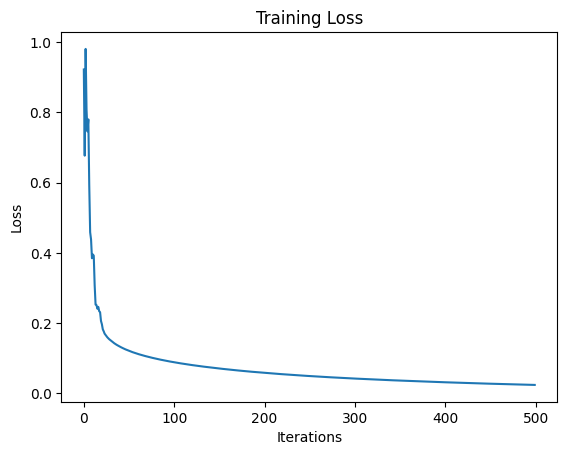

In [ ]:
plt.plot(loss_list)
plt.title("Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.show()

**Random Test**

In [ ]:
test_X_np = test_X_np.reshape(-1, 28*28)
X = test_X_np[:5000]/255
X.shape

(5000, 784)

In [ ]:
y = test_y_np[:5000]
y.shape

(5000,)

In [ ]:
cout = 0

# forward pass
_ , _ , output = forward(X, w1_new, b1_new, w2_new, b2_new)

pred = prediction(output)

print('Validation Accuracy: {:.2f}%'.format( (np.sum(pred == y) / y.size) * 100))

Validation Accuracy: 91.54%


#CNN

![](https://editor.analyticsvidhya.com/uploads/89175cnn_banner.png)

In [ ]:
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch import flatten

In [ ]:
class CNN(nn.Module):
  def __init__(self, x_size, y_size):

    super().__init__()

    # for convolution
    self.conv1 = Conv2d(1, 6, 3)
    self.pool1 = MaxPool2d(kernel_size=(2, 2))
    self.conv2 = Conv2d(6, 32, 3)
    self.pool2 = MaxPool2d(kernel_size=(2, 2))
    self.flat = nn.Flatten()

    # Calculate the size of the output from the conv and pool layers
    conv_output_size = self._get_conv_output(x_size, y_size)

    # for neural network
    self.Linear1 = Linear(conv_output_size, 256)
    self.Linear2 = Linear(256, 10)

  def _get_conv_output(self, x_size, y_size):
    # Create a dummy input with the correct x_size and y_size
    x = torch.rand(1, 1, x_size, y_size)
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.flat(x)
    return x.shape[1]  # Return the size of the output

  def forward(self, x):
    # convolution
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.flat(x)

    # neural network
    x = self.Linear1(x)
    x = torch.relu(x)
    x = self.Linear2(x)

    return x


Epoch 1; Training Loss 0.232022;
Epoch 2; Training Loss 0.334931;
Epoch 3; Training Loss 0.157984;
Epoch 4; Training Loss 0.365213;
Epoch 5; Training Loss 0.142557;
Epoch 6; Training Loss 0.141575;
Epoch 7; Training Loss 0.217198;
Epoch 8; Training Loss 0.128665;
Epoch 9; Training Loss 0.123361;
Epoch 10; Training Loss 0.079742;


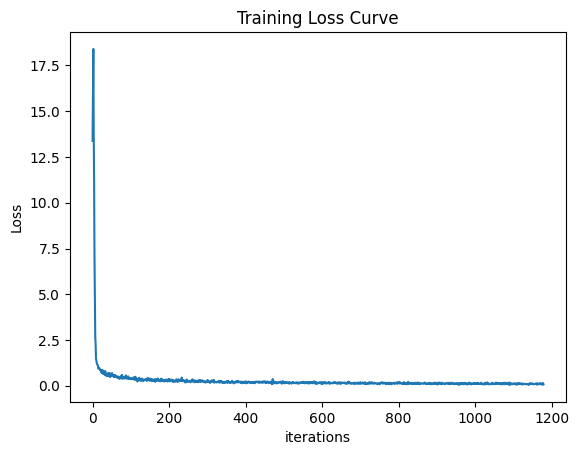

In [ ]:
#def train_test_cnn(Model, iteration=10, lr=0.01):

model = CNN(28,28)
iteration = 10
lr=0.001

lossf = nn.CrossEntropyLoss()
losses = []
optimizer = torch.optim.SGD(model.parameters(), lr)

# Training
for epoch in range(iteration):

  for X, y in iter(train_loader):

    X = X.view(-1, 1, 28, 28).float()

    y_hat = model(X)

    loss = lossf(y_hat, y)

    optimizer.zero_grad() # clear the gradient
    loss.backward() #calculate the gradient
    optimizer.step() # apply the update

    losses.append(float(loss))

  print("Epoch %d; Training Loss %f;" % (epoch+1, loss))


plt.title("Training Loss Curve")
plt.plot(losses, label="Train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.show()


In [ ]:
# Testing
correct = 0
total = 0
model.eval()
for X, y in iter(test_loader):
  X = X.view(-1, 1, 28, 28).float()
  y = y.view(-1, 1)
  outputs = model(X)
  predict = torch.max(outputs.data,1)[1] # [1] returns the index (class) of the max value for each sample

  # Compute the accuracy
  total += y.size(0)
  correct += predict.eq(y.view_as(predict)).sum().item()

print('Validation Accuracy: {:.2f}%'.format(100 * correct / total))

Validation Accuracy: 96.35%




---



usefull links:

https://pyimagesearch.com/2021/07/19/pytorch-training-your-first-convolutional-neural-network-cnn/


https://jamesmccaffrey.wordpress.com/2022/02/04/yet-another-mnist-using-a-cnn-with-pytorch-example/

https://machinelearningmastery.com/building-a-convolutional-neural-network-in-pytorch/